In [1]:
import json
from pandas.io.json import json_normalize
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set(font_scale=1.5)
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

In [3]:
df = pd.DataFrame()
for filename in glob.glob('./DATABASE/*.json'):
    with open(filename) as json_file:
        data = json.load(json_file)
        new = json_normalize(data['log_monitoring'][0]['contents'])
        new['User_name'] = filename.split('__')[3]
        df= pd.concat([df, new])

/home/coop/gullaud/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [4]:
ind = np.arange(0, len(df), 1)
ind = pd.Series(ind)
df['index_run'] = ind.values
df = df.set_index('index_run')

In [5]:
df.head()

User_name        creation_time  \
index_run                                  
0           bmartin  2020-01-12T23:42:42   
1           bmartin  2019-09-09T04:36:55   
2           bmartin  2020-01-12T23:45:15   
3           bmartin  2020-01-12T18:07:06   
4          sengupta  2020-05-03T11:11:17   

                                               err_log params.CFL  \
index_run                                                           
0                             [before wrap up\n ok, 0]   20000000   
1                             [before wrap up\n ok, 0]   70000000   
2                             [before wrap up\n ok, 0]   20000000   
3                             [before wrap up\n ok, 0]   20000000   
4          [wall dist ok,\n before other preproc, 290]   70000000   

          params.LES_model params.artificial_viscosity_model  \
index_run                                                      
0                       no                                no   
1                    smago                             colin   
2                       no                                no   
3                       no                                no   
4                    smago                     colin_species   

          params.convection_scheme params.mixture_name params.ncell_group  \
index_run                                                                   
0                               LW                 AIR                100   
1                               LW                 AIR                 40   
2                               LW                 AIR                100   
3                            TTG4A                 AIR                100   
4                             TTGC                C3H8                 60   

          params.partitioner  ...  vars.MPI_processes  vars.dimension  \
index_run                     ...                                       
0                   parmetis  ...                 1.0             1.0   
1                   parmetis  ...                 2.0             2.0   
2                   parmetis  ...                 2.0             2.0   
3                   parmetis  ...                36.0             2.0   
4                   parmetis  ...               540.0             2.0   

          vars.elapsed_time vars.final_iteration  vars.initial_iteration  \
index_run                                                                  
0                      1.00               3841.0                     1.0   
1                      2.00             800000.0                     2.0   
2                      2.00               4801.0                     2.0   
3                      1.45               3840.0                     0.0   
4                  41997.24            1439505.0                     0.0   

          vars.initial_time  vars.nodes  vars.number_of_probes  \
index_run                                                        
0                       1.0         1.0                    NaN   
1                       2.0         2.0                    NaN   
2                       2.0         2.0                    NaN   
3                       0.0      1802.0                    NaN   
4                       0.0    961367.0                    6.0   

           vars.physical_time  vars.time_per_ite  
index_run                                         
0                    1.000000             1.0000  
1                    2.000000             2.0000  
2                    2.000000             2.0000  
3                    0.005760             0.0002  
4                    0.008447            83.2870  

[5 rows x 27 columns]

In [6]:
df.columns

Index(['User_name', 'creation_time', 'err_log', 'params.CFL',
       'params.LES_model', 'params.artificial_viscosity_model',
       'params.convection_scheme', 'params.mixture_name', 'params.ncell_group',
       'params.partitioner', 'params.reactive_flow', 'params.real_gas',
       'params.smu2', 'params.solver_type', 'params.two_phase_flow',
       'vars.AVBP_version', 'vars.CPU_time_s', 'vars.MPI_processes',
       'vars.dimension', 'vars.elapsed_time', 'vars.final_iteration',
       'vars.initial_iteration', 'vars.initial_time', 'vars.nodes',
       'vars.number_of_probes', 'vars.physical_time', 'vars.time_per_ite'],
      dtype='object')

# some filling of NaN values

In [7]:
df.isnull().sum()

User_name                               0
creation_time                           0
err_log                                 0
params.CFL                              0
params.LES_model                        0
params.artificial_viscosity_model       0
params.convection_scheme                0
params.mixture_name                     0
params.ncell_group                      8
params.partitioner                      9
params.reactive_flow                    3
params.real_gas                       752
params.smu2                          1484
params.solver_type                      0
params.two_phase_flow                2922
vars.AVBP_version                      46
vars.CPU_time_s                       182
vars.MPI_processes                     51
vars.dimension                          9
vars.elapsed_time                     167
vars.final_iteration                  173
vars.initial_iteration                 11
vars.initial_time                      11
vars.nodes                        

In [8]:
# un run qui a Nan en nb of probes est un run qui n'a pas de probes
df['vars.number_of_probes'] = df['vars.number_of_probes'].fillna(0.0)

In [9]:
df['params.real_gas'] = df['params.real_gas'].fillna(0.0)

In [10]:
# un run qui n'a pas tourné a 0 en CPU_time ...
df['vars.CPU_time_s'] = df['vars.CPU_time_s'].fillna(0.0)

In [11]:
df['params.two_phase_flow'] = df['params.two_phase_flow'].fillna(0.0)

In [12]:
df['vars.physical_time'] = df['vars.physical_time'].fillna(0.0)

In [13]:
df['vars.elapsed_time'] = df['vars.elapsed_time'].fillna(0.0)
df['vars.final_iteration'] = df['vars.final_iteration'].fillna(0.0)
df['vars.initial_time'] = df['vars.initial_time'].fillna(0.0)


In [14]:
df['params.LES_model'] = df['params.LES_model'].apply(lambda x: 'DNS' if x=='no' else x )

In [15]:
df['params.artificial_viscosity_model'] = df['params.artificial_viscosity_model'].apply(lambda x: 'colin_species' if x == 'Colin_species' else x)

In [16]:
df.isnull().sum()

User_name                               0
creation_time                           0
err_log                                 0
params.CFL                              0
params.LES_model                        0
params.artificial_viscosity_model       0
params.convection_scheme                0
params.mixture_name                     0
params.ncell_group                      8
params.partitioner                      9
params.reactive_flow                    3
params.real_gas                         0
params.smu2                          1484
params.solver_type                      0
params.two_phase_flow                   0
vars.AVBP_version                      46
vars.CPU_time_s                         0
vars.MPI_processes                     51
vars.dimension                          9
vars.elapsed_time                       0
vars.final_iteration                    0
vars.initial_iteration                 11
vars.initial_time                       0
vars.nodes                        

In [17]:
df = df.dropna(subset=['vars.nodes'])

In [18]:
df['mesh_cells'] = df['vars.nodes'].apply(lambda x : int(x/3))

In [19]:
df = df.dropna(subset=['vars.time_per_ite'])

In [20]:
df = df.dropna(subset=['vars.MPI_processes'])

In [21]:
df['vars.nodes'] = df['vars.nodes'].apply(lambda x: int(x))

In [22]:
df['vars.dimension'] = df['vars.dimension'].apply(lambda x: int(x))

In [23]:
df['vars.MPI_processes'] = df['vars.MPI_processes'].apply(lambda x: int(x))

In [24]:
df['vars.time_per_ite'] = df['vars.time_per_ite'].fillna(0.0)

# Separation en deux dataframes

## creation de deux dataframe, un pour le setup, un pour le résultat 

On sépare le dataframe en un dataframe de setup du run , majoritairement les parametres lus dans run.params, et un dataframe qui contient plus des valeurs qui sortent du avbp.o

In [25]:
run_setup = ['params.CFL', 'params.LES_model',
       'params.artificial_viscosity_model', 'params.convection_scheme',
       'params.mixture_name', 'params.ncell_group', 'params.partitioner',
       'params.reactive_flow', 'params.real_gas', 'params.smu2',
       'params.solver_type', 'params.two_phase_flow', 'vars.AVBP_version', 
        'vars.MPI_processes', 'vars.dimension', 
       'vars.nodes', 'vars.number_of_probes']

In [26]:
run_setup

['params.CFL',
 'params.LES_model',
 'params.artificial_viscosity_model',
 'params.convection_scheme',
 'params.mixture_name',
 'params.ncell_group',
 'params.partitioner',
 'params.reactive_flow',
 'params.real_gas',
 'params.smu2',
 'params.solver_type',
 'params.two_phase_flow',
 'vars.AVBP_version',
 'vars.MPI_processes',
 'vars.dimension',
 'vars.nodes',
 'vars.number_of_probes']

In [27]:
run_result = ['creation_time', 'err_log','vars.CPU_time_s', 'vars.elapsed_time', 'vars.final_iteration', 'vars.initial_iteration',
       'vars.initial_time', 'vars.physical_time', 'vars.time_per_ite', 'User_name' ]

In [28]:
run_result

['creation_time',
 'err_log',
 'vars.CPU_time_s',
 'vars.elapsed_time',
 'vars.final_iteration',
 'vars.initial_iteration',
 'vars.initial_time',
 'vars.physical_time',
 'vars.time_per_ite',
 'User_name']

In [29]:
df_setup = df[run_setup]

In [30]:
df_log = df[run_result]

In [31]:
df_setup.head()

params.CFL params.LES_model params.artificial_viscosity_model  \
index_run                                                                 
0           20000000              DNS                                no   
1           70000000            smago                             colin   
2           20000000              DNS                                no   
3           20000000              DNS                                no   
4           70000000            smago                     colin_species   

          params.convection_scheme params.mixture_name params.ncell_group  \
index_run                                                                   
0                               LW                 AIR                100   
1                               LW                 AIR                 40   
2                               LW                 AIR                100   
3                            TTG4A                 AIR                100   
4                             TTGC                C3H8                 60   

          params.partitioner  params.reactive_flow  params.real_gas  \
index_run                                                             
0                   parmetis                   0.0              0.0   
1                   parmetis                   0.0              0.0   
2                   parmetis                   0.0              0.0   
3                   parmetis                   0.0              0.0   
4                   parmetis                   1.0              0.0   

          params.smu2 params.solver_type  params.two_phase_flow  \
index_run                                                         
0                 NaN              Euler                    0.0   
1                   0                 ns                    0.0   
2                 NaN              Euler                    0.0   
3                 NaN              Euler                    0.0   
4                   0                 ns                    0.0   

          vars.AVBP_version  vars.MPI_processes  vars.dimension  vars.nodes  \
index_run                                                                     
0                     7.5.0                   1               1           1   
1                     7.3.0                   2               2           2   
2                     7.5.0                   2               2           2   
3                     7.5.0                  36               2        1802   
4                     7.6.0                 540               2      961367   

           vars.number_of_probes  
index_run                         
0                            0.0  
1                            0.0  
2                            0.0  
3                            0.0  
4                            6.0

In [32]:
df_setup.head()

params.CFL params.LES_model params.artificial_viscosity_model  \
index_run                                                                 
0           20000000              DNS                                no   
1           70000000            smago                             colin   
2           20000000              DNS                                no   
3           20000000              DNS                                no   
4           70000000            smago                     colin_species   

          params.convection_scheme params.mixture_name params.ncell_group  \
index_run                                                                   
0                               LW                 AIR                100   
1                               LW                 AIR                 40   
2                               LW                 AIR                100   
3                            TTG4A                 AIR                100   
4                             TTGC                C3H8                 60   

          params.partitioner  params.reactive_flow  params.real_gas  \
index_run                                                             
0                   parmetis                   0.0              0.0   
1                   parmetis                   0.0              0.0   
2                   parmetis                   0.0              0.0   
3                   parmetis                   0.0              0.0   
4                   parmetis                   1.0              0.0   

          params.smu2 params.solver_type  params.two_phase_flow  \
index_run                                                         
0                 NaN              Euler                    0.0   
1                   0                 ns                    0.0   
2                 NaN              Euler                    0.0   
3                 NaN              Euler                    0.0   
4                   0                 ns                    0.0   

          vars.AVBP_version  vars.MPI_processes  vars.dimension  vars.nodes  \
index_run                                                                     
0                     7.5.0                   1               1           1   
1                     7.3.0                   2               2           2   
2                     7.5.0                   2               2           2   
3                     7.5.0                  36               2        1802   
4                     7.6.0                 540               2      961367   

           vars.number_of_probes  
index_run                         
0                            0.0  
1                            0.0  
2                            0.0  
3                            0.0  
4                            6.0

In [33]:
df_log.head()

creation_time                                      err_log  \
index_run                                                                     
0          2020-01-12T23:42:42                     [before wrap up\n ok, 0]   
1          2019-09-09T04:36:55                     [before wrap up\n ok, 0]   
2          2020-01-12T23:45:15                     [before wrap up\n ok, 0]   
3          2020-01-12T18:07:06                     [before wrap up\n ok, 0]   
4          2020-05-03T11:11:17  [wall dist ok,\n before other preproc, 290]   

           vars.CPU_time_s  vars.elapsed_time  vars.final_iteration  \
index_run                                                             
0             6.217000e+00               1.00                3841.0   
1             2.720000e+06               2.00              800000.0   
2             2.435000e+02               2.00                4801.0   
3             5.208000e+01               1.45                3840.0   
4             2.268000e+07           41997.24             1439505.0   

           vars.initial_iteration  vars.initial_time  vars.physical_time  \
index_run                                                                  
0                             1.0                1.0            1.000000   
1                             2.0                2.0            2.000000   
2                             2.0                2.0            2.000000   
3                             0.0                0.0            0.005760   
4                             0.0                0.0            0.008447   

           vars.time_per_ite User_name  
index_run                               
0                     1.0000   bmartin  
1                     2.0000   bmartin  
2                     2.0000   bmartin  
3                     0.0002   bmartin  
4                    83.2870  sengupta

In [34]:
df.isnull().sum()

User_name                               0
creation_time                           0
err_log                                 0
params.CFL                              0
params.LES_model                        0
params.artificial_viscosity_model       0
params.convection_scheme                0
params.mixture_name                     0
params.ncell_group                      4
params.partitioner                      5
params.reactive_flow                    3
params.real_gas                         0
params.smu2                          1433
params.solver_type                      0
params.two_phase_flow                   0
vars.AVBP_version                       0
vars.CPU_time_s                         0
vars.MPI_processes                      0
vars.dimension                          0
vars.elapsed_time                       0
vars.final_iteration                    0
vars.initial_iteration                  0
vars.initial_time                       0
vars.nodes                        

# User's habits

In this section runs are going to be sorted by year, hour and day when they were created.
This helps to see the user's habits for optimization of his access to the clusters.

In [35]:
df_log['time'] = pd.to_datetime(df_log['creation_time'])

/home/coop/gullaud/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
df_log['Hour'] = df_log['time'].apply(lambda time: time.hour)
df_log['Month'] = df_log['time'].apply(lambda time: time.month)
df_log['Day of Week'] = df_log['time'].apply(lambda time: time.dayofweek)
df_log['year'] = df_log['time'].apply(lambda time: time.year)

/home/coop/gullaud/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/coop/gullaud/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/coop/gullaud/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [37]:
dict_semaine = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [38]:
semaine = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [39]:
df_log['Day of Week'] = df_log['Day of Week'].map(dict_semaine)

/home/coop/gullaud/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
dict_year = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 
             9: 'September', 10: 'October', 11: 'November', 12: 'December'}

In [41]:
year = dict_year.values()
hours = np.arange(1,25)
hours

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [42]:
df_log['Month'] = df_log['Month'].map(dict_year)

/home/coop/gullaud/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


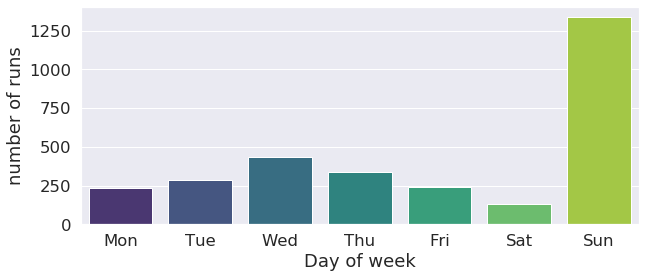

<Figure size 720x432 with 0 Axes>

In [43]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(1,1,1)
sns.countplot(x='Day of Week',data=df_log, order= semaine,palette='viridis')
ax.set_xlabel('Day of week')
ax.set_ylabel('number of runs')
fig = plt.figure(figsize = (10,6))

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

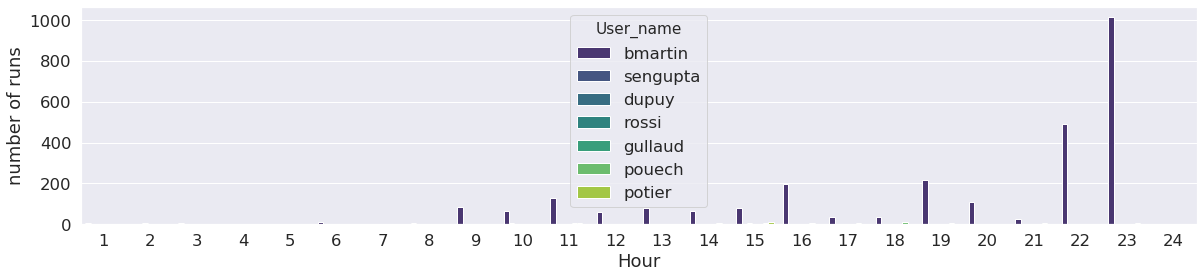

<Figure size 720x432 with 0 Axes>

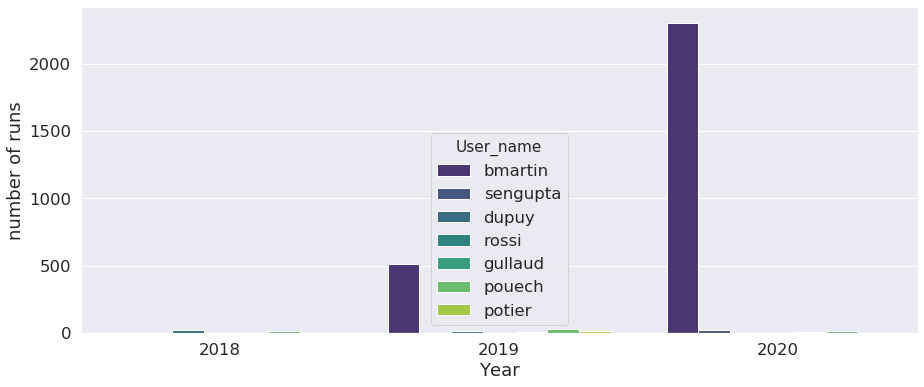

<Figure size 720x432 with 0 Axes>

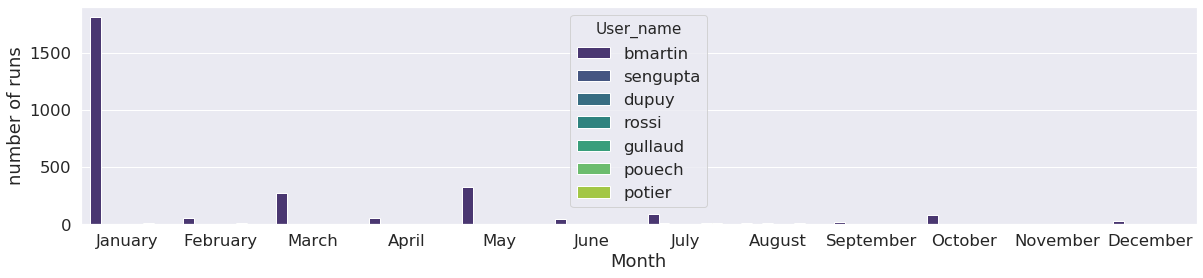

<Figure size 720x432 with 0 Axes>

In [44]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize = (20,4))
ax = fig.add_subplot(1,1,1)
sns.countplot(x='Hour',data=df_log, order = hours, 
              hue = df_log['User_name'], palette='viridis')
ax.set_xlabel('Hour')
ax.set_ylabel('number of runs')
fig = plt.figure(figsize = (10,6))

sns.set(font_scale=1.5)
fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot(1,1,1)
sns.countplot(x='year',data=df_log, hue = df_log['User_name'], palette='viridis')
ax.set_xlabel('Year')
ax.set_ylabel('number of runs')
fig = plt.figure(figsize = (10,6))

sns.set(font_scale=1.5)
fig = plt.figure(figsize = (20,4))
ax = fig.add_subplot(1,1,1)
sns.countplot(x='Month',data=df_log, order = year, 
              hue = df_log['User_name'],
              palette='viridis')
ax.set_xlabel('Month')
ax.set_ylabel('number of runs')
fig = plt.figure(figsize = (10,6))

In [45]:
df_log['User_name']

index_run
0        bmartin
1        bmartin
2        bmartin
3        bmartin
4       sengupta
5        bmartin
6        bmartin
8        bmartin
9          dupuy
10       bmartin
11       bmartin
12       bmartin
13       bmartin
14       bmartin
15       bmartin
16       bmartin
17       bmartin
18       bmartin
19       bmartin
20         rossi
21       bmartin
22       bmartin
23       bmartin
24       bmartin
25       bmartin
26       bmartin
27       bmartin
28       gullaud
29       bmartin
31       bmartin
          ...   
3186     bmartin
3188     bmartin
3189     bmartin
3190     bmartin
3191     bmartin
3192     bmartin
3193     bmartin
3194     bmartin
3195     bmartin
3197     bmartin
3198      pouech
3199     bmartin
3200     bmartin
3201     bmartin
3202     bmartin
3203     bmartin
3204     bmartin
3205     bmartin
3206     bmartin
3207     bmartin
3208     bmartin
3209     bmartin
3210     bmartin
3211     bmartin
3212     bmartin
3213     bmartin
3214     bmartin
3215

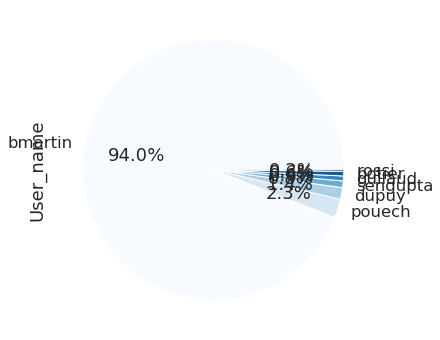

In [46]:
fig = plt.figure(figsize = (10,6))
df['User_name'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%',
                                                   cmap = 'Blues')
#state=['converged', 'not converged']
#plt.legend(['converged', 'not converged'])

# Statistics on runs launched depending on their parameters

## Number of runs depending on Mixture name

Text(0, 0.5, 'number of runs')

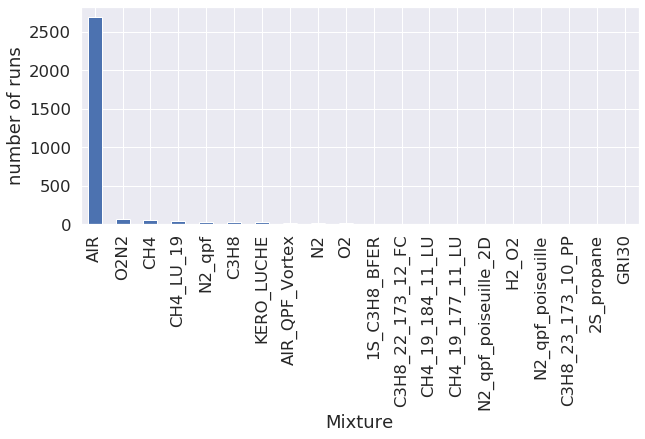

In [47]:
fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(1,1,1)
#sns.countplot(x = 'params.mixture_name', data = df_setup)
df_setup['params.mixture_name'].value_counts().plot(kind = 'bar')
ax.set_xlabel('Mixture')
ax.set_ylabel('number of runs')

## Number of runs depending on dimension

Text(0, 0.5, 'number of runs')

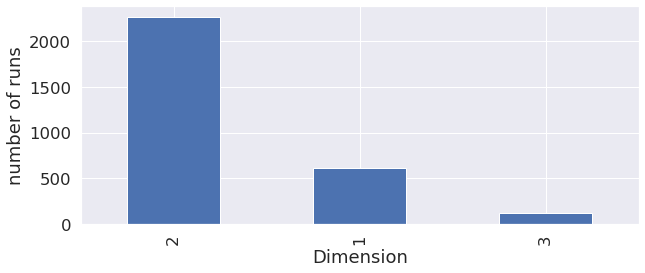

In [48]:
fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(1,1,1)
df_setup['vars.dimension'].value_counts().plot(kind = 'bar')
ax.set_xlabel('Dimension')
ax.set_ylabel('number of runs')

## Number of runs depending on dimension colored by mixture_name

Text(61.5, 0.5, 'Dimension')

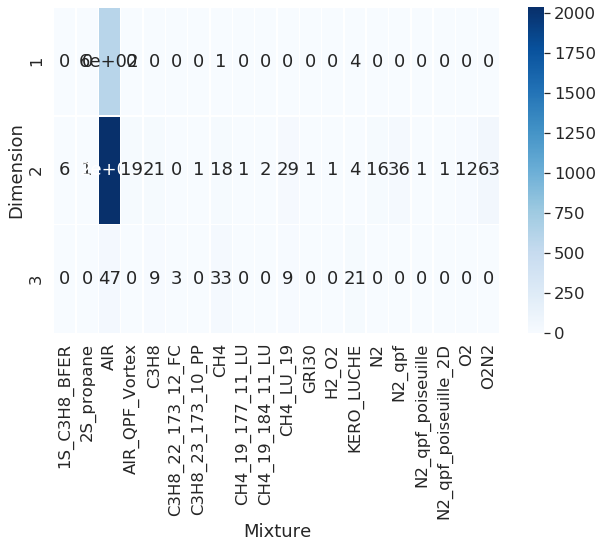

In [49]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1)
dummies_mixturename = pd.get_dummies(df['params.mixture_name'])
df_pca = pd.concat([df.drop('params.mixture_name', axis = 1), dummies_mixturename], axis=1)
df_pca.groupby('vars.dimension').count()
df_heatmap = df_pca[dummies_mixturename.columns]
df_heatmap = pd.concat([df_heatmap, df['vars.dimension']], axis = 1)
df_heatmap.groupby('vars.dimension').sum()
sns.heatmap(df_heatmap.groupby('vars.dimension').sum(),
            annot = True, cmap = "Blues", 
            lw = 0.4)
ax.set_xlabel('Mixture')
ax.set_ylabel('Dimension')

## Number of runs depending on artificial viscosity model

Text(0, 0.5, 'number of runs')

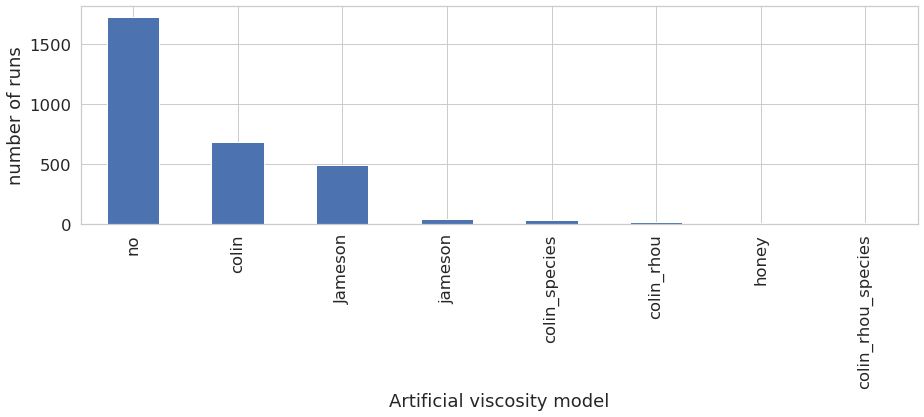

In [50]:
sns.set_style("whitegrid")
fig = plt.figure(figsize = (15,4))
ax = fig.add_subplot(1,1,1)
df_setup['params.artificial_viscosity_model'].value_counts().plot(kind = 'bar')
ax.set_xlabel('Artificial viscosity model')
ax.set_ylabel('number of runs')

## Number or runs depending on LES model

Text(0, 0.5, 'number of runs')

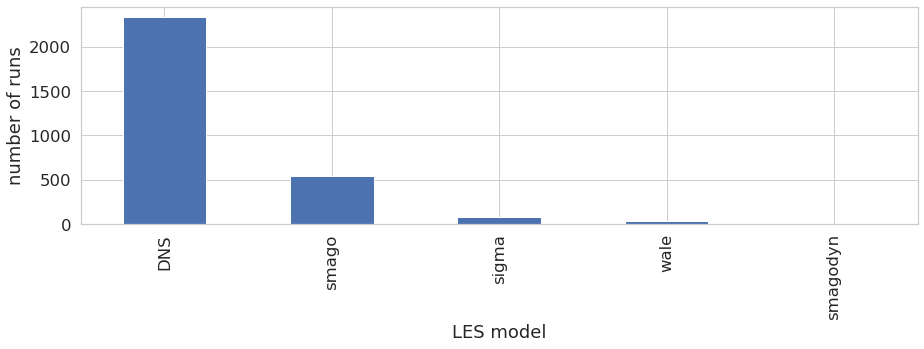

In [51]:
fig = plt.figure(figsize = (15,4))
ax = fig.add_subplot(1,1,1)
df_setup['params.LES_model'].value_counts().plot(kind = "bar")
ax.set_xlabel('LES model')
ax.set_ylabel('number of runs')


## Cross plot of LES Model and artificial viscosity model

Index(['DNS', 'sigma', 'smago', 'smagodyn', 'wale'], dtype='object')
           DNS  sigma  smago  smagodyn  wale params.artificial_viscosity_model
index_run                                                                     
0            1      0      0         0     0                                no
1            0      0      1         0     0                             colin
2            1      0      0         0     0                                no
3            1      0      0         0     0                                no
4            0      0      1         0     0                     colin_species


Text(60.296874999999986, 0.5, 'Artificial viscosity model')

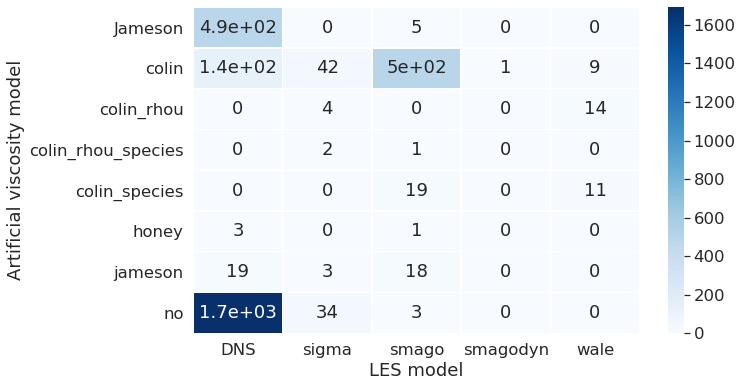

In [52]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1)
dummies_LESmodel = pd.get_dummies(df['params.LES_model'])
print(dummies_LESmodel.columns)
df_pca2 = pd.concat([df.drop('params.LES_model', axis = 1), dummies_LESmodel], axis=1)
df_heatmap2 = df_pca2[dummies_LESmodel.columns]
df_heatmap2 = pd.concat([df_heatmap2, df['params.artificial_viscosity_model']], axis = 1)
print(df_heatmap2.head())
df_heatmap2.groupby('params.artificial_viscosity_model').sum()
sns.heatmap(df_heatmap2.groupby('params.artificial_viscosity_model').sum(),
            annot = True, cmap = "Blues", 
            lw = 0.4)
ax.set_xlabel('LES model')
ax.set_ylabel('Artificial viscosity model')

# Machine usage tendency: HPC statistics

## Mesh number of nodes repartition

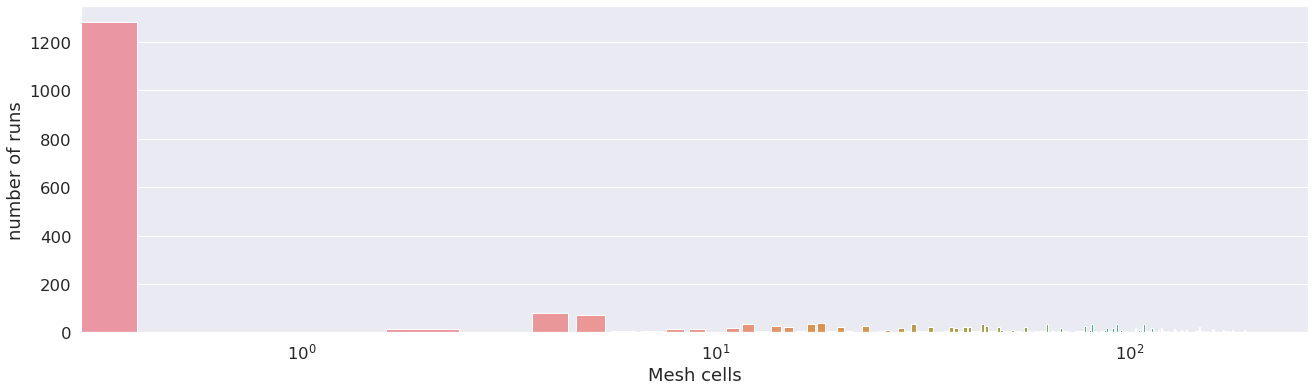

In [53]:
fig = plt.figure(figsize = (22,6))
ax = fig.add_subplot(1,1,1)
#sns.distplot(df['vars.nodes'])
#df['vars.nodes'].plot.hist(bins=100)
sns.countplot(x = 'mesh_cells', data = df)
ax.set_xlabel('Mesh cells')
ax.set_ylabel('number of runs')
plt.xscale('log')
#ax.set_xlim(1,1000)

## Number of nodes repartition colored by the number of procs: heatmap

Text(0.5, 61.5, 'MPI processors')

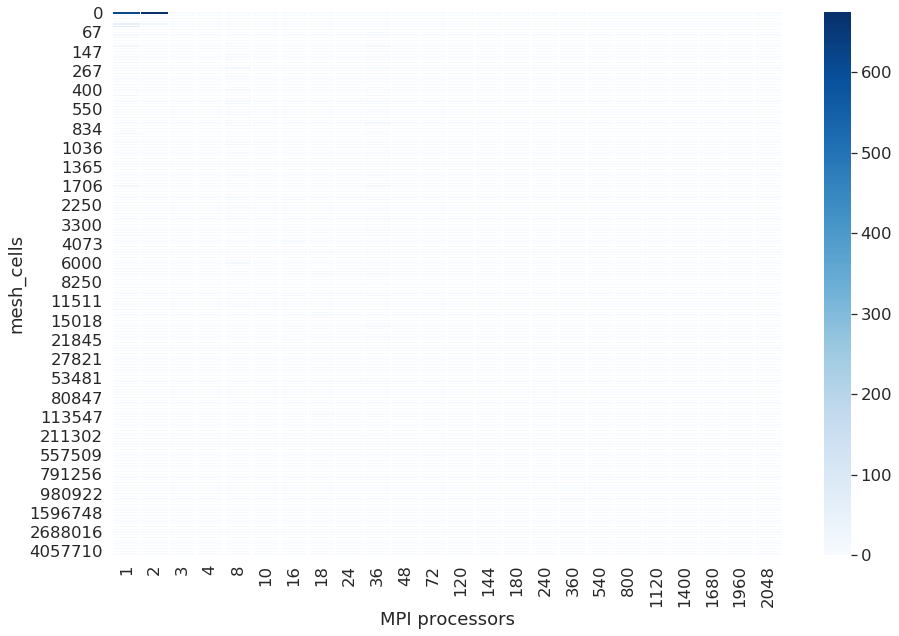

In [54]:
fig = plt.figure(figsize = (15,10))
dummies_MPI_processes = pd.get_dummies(df['vars.MPI_processes'])
ax = fig.add_subplot(1,1,1)
df_pca3 = pd.concat([df.drop('vars.MPI_processes', axis = 1), dummies_MPI_processes], axis=1)
df_scatter = df_pca3.groupby('mesh_cells').sum()[dummies_MPI_processes.columns]
#df_scatter.columns = ['1', '8', '36', '540', '1120']
sns.heatmap(df_scatter, lw = 0.5, cmap = 'Blues')
ax.set_xlabel('MPI processors')


## MPI procs (number of runs by number of procs): User's habits

Text(0, 0.5, 'number of runs')

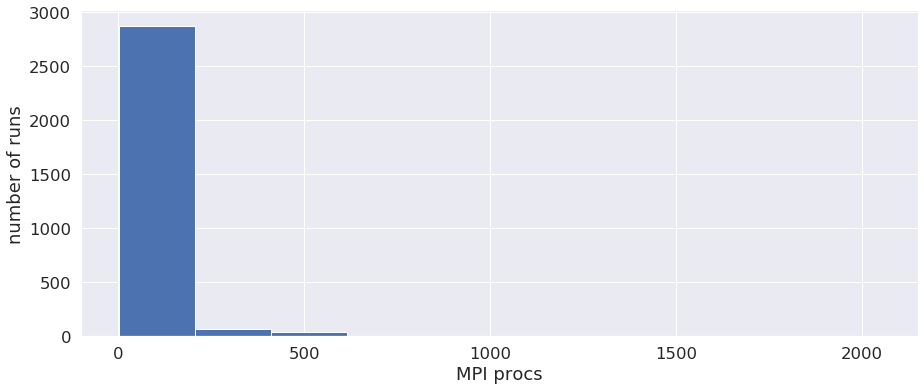

In [55]:
fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot(1,1,1)
df['vars.MPI_processes'].plot.hist(bins = 10)
ax.set_xlabel('MPI procs')
ax.set_ylabel('number of runs')

In [60]:
import numpy as np

Text(106.5, 0.5, 'Ncell_groups')

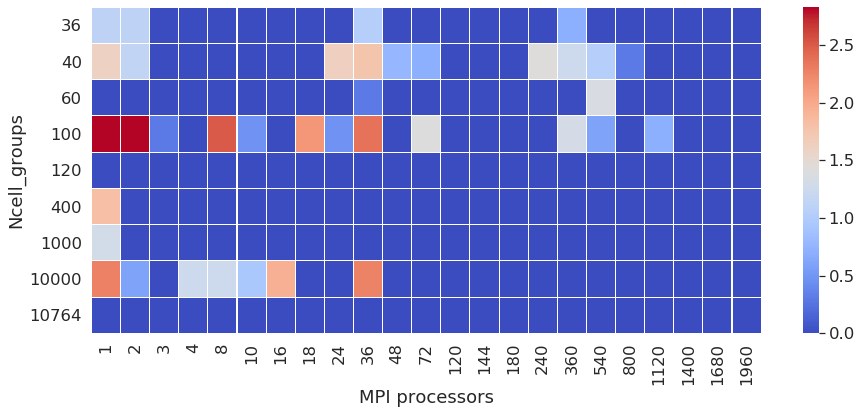

In [79]:

df = df.dropna(subset=['params.ncell_group'])
df['params.ncell_group'] = df['params.ncell_group'].apply(lambda x: int(x))
fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot(1,1,1)
dummies_MPI_processes = pd.get_dummies(df['vars.MPI_processes'])
df_pca3 = pd.concat([df.drop('vars.MPI_processes', axis = 1), dummies_MPI_processes], axis=1)
df_scatter = df_pca3.groupby('params.ncell_group').sum()[dummies_MPI_processes.columns]
df_scatter = np.clip(df_scatter, 1, None)
sns.heatmap(np.log10(df_scatter), lw = 0.1, cmap = 'coolwarm')
ax.set_xlabel('MPI processors')
ax.set_ylabel('Ncell_groups')

Text(106.5, 0.5, 'Dimension')

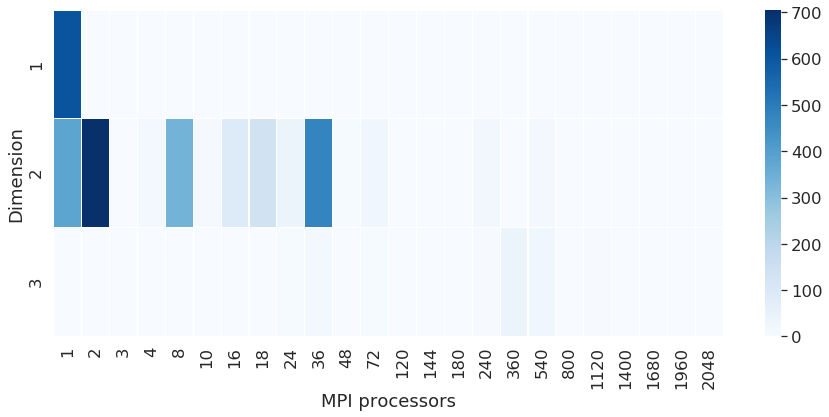

In [57]:
fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot(1,1,1)
dummies_MPI_processes = pd.get_dummies(df['vars.MPI_processes'])
df_pca3 = pd.concat([df.drop('vars.MPI_processes', axis = 1), dummies_MPI_processes], axis=1)
df_scatter = df_pca3.groupby('vars.dimension').sum()[dummies_MPI_processes.columns]
sns.heatmap(df_scatter, lw = 0.1, cmap = 'Blues')
ax.set_xlabel('MPI processors')
ax.set_ylabel('Dimension')

# Scalability and efficiency

In [58]:
# calcul de l'efficacité (temps passé par coeur /itération pour calculer un point), on sépare par dimension (2D et 3D)
#df['eff'] = df['vars.time_per_ite']*1000000/df['vars.nodes']
df_3D = df[df['vars.dimension'] == 3]
df_2D = df[df['vars.dimension'] == 2]
df_3D['eff'] = df_3D['vars.time_per_ite']*1000000/df_3D['vars.nodes']
df_2D['eff'] = df_2D['vars.time_per_ite']*1000000/df_2D['vars.nodes']

/home/coop/gullaud/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/coop/gullaud/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Scalability : evolution of time per iteration when increasing the number of processors

ValueError: These `style` levels are missing markers: {36, 72, 360, 240, 48, 180, 24, 540}

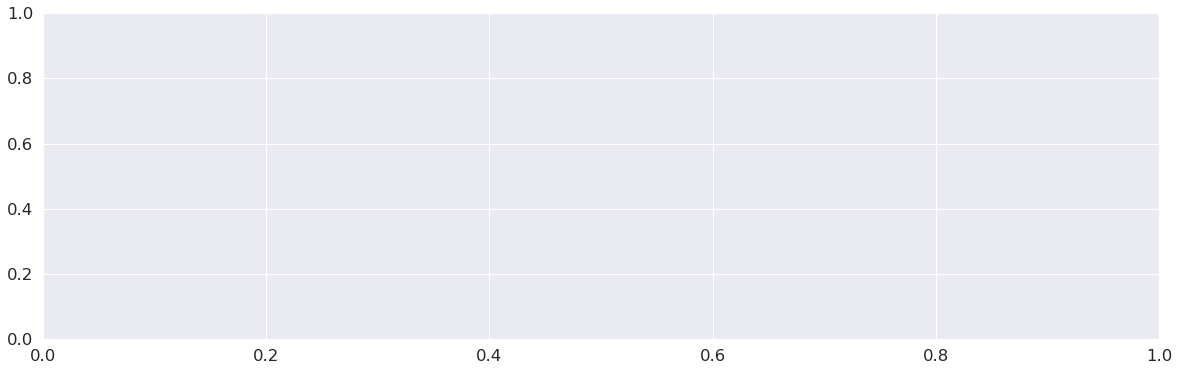

In [65]:
df['vars.time_per_ite'] = df['vars.time_per_ite']
fig = plt.figure(figsize = (20,6))
ax = fig.add_subplot(1,1,1)
sns.scatterplot(x ='vars.nodes', y = 'vars.time_per_ite', 
                data = df_2D, ax = ax, hue = 'vars.MPI_processes', 
               style ='vars.MPI_processes')
               #palette = "Set2")
           #size = 'vars.MPI_processes')
ax.set_xlabel('Mesh number of nodes')
ax.set_ylabel('Time per iteration (ms)')
plt.xscale('log')
plt.legend(loc = 2)

In [ ]:
df_2D['eff']
df_2D = df_2D.drop([14], axis = 0)

In [ ]:
fig = plt.figure(figsize = (20,20))

ax1 = fig.add_subplot(2,2,1)
sns.violinplot(x = 'vars.MPI_processes', y = 'eff', data = df_2D, ax = ax1)
#sns.scatterplot(x = 'vars.MPI_processes', y = 'eff', data = df_2D, ax = ax1)

#plt.xscale('log')
plt.yscale('log')
ax1.set_xlabel('MPI procs')
ax1.set_title('2D')
ax1.set_ylabel('Efficiency')

ax2 = fig.add_subplot(2,2,2)
sns.violinplot(x = 'vars.MPI_processes', y = 'eff', data = df_3D, ax = ax2)
#sns.scatterplot(x = 'vars.MPI_processes', y = 'eff', data = df_3D, ax = ax2)

ax2.set_xlabel('MPI procs')
ax2.set_title('3D')
ax2.set_ylabel('Efficiency')
#plt.xscale('log')
plt.yscale('log')

# Work on error log

We add a column with the error code if the error code is 0, it means that the run is converged.
so we create a column 'CONVERGED' which can take the value 0 or 1.

In [ ]:
df['error_code'] = df['err_log'].apply(lambda x: str(x).split(',')[-1][:-1])

In [ ]:
df.head()

In [ ]:
df['error_code'].value_counts()

In [ ]:
def conversion(x):
    if x =='0':
        return 1
    else:
        return 0

In [ ]:
df['converged'] = df['error_code'].apply(conversion)

In [ ]:
df['error_code'] = df['error_code'].apply(lambda x : int(x))

In [ ]:
fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot(1,1,1)
dummies_username = pd.get_dummies(df['User_name'])
df_pca3 = pd.concat([df.drop('User_name', axis = 1), dummies_username], axis=1)
df_scatter = df_pca3.groupby('error_code').sum()[dummies_username.columns]
sns.heatmap(df_scatter, lw = 0.1, cmap = 'Blues')
ax.set_xlabel('Username')
ax.set_ylabel('Error code')

In [ ]:
fig = plt.figure(figsize = (10,6))
df['error_code'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%',
                                                   cmap = 'viridis')
state=['converged', 'not converged']
plt.legend(['converged', 'not converged'])
#plt.legend(loc = 1)